<a href="https://colab.research.google.com/github/fatimaabuhamdeh/LAB-AI/blob/main/%D9%86%D9%85%D9%88%D8%B0%D8%AC_%D9%83%D9%88%D8%AF_%D9%85%D8%B4%D8%B1%D9%88%D8%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf

# تحميل قاعدة بيانات MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# تحويل البيانات إلى نطاق [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# بناء النموذج
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

# تحديد وظيفة خسارة الصور المزيفة
def fake_image_loss(y_true, y_pred):
    return tf.keras.losses.CategoricalCrossentropy()(y_true, y_pred)

# تحديد معيار التقييم
def accuracy(y_true, y_pred):
    # تحديد الفئة الفائزة
    predicted_class = tf.argmax(y_pred, axis=1)
    # حساب الدقة
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted_class, tf.argmax(y_true, axis=1)), tf.float32))
    return accuracy

# تحديد النموذج والتدريب
model.compile(optimizer='adam',
              loss=fake_image_loss,
              metrics=[accuracy])

model.fit(x_train, tf.one_hot(y_train, depth=10), epochs=5)

# تقييم النموذج
test_loss, test_accuracy = model.evaluate(x_test, tf.one_hot(y_test, depth=10))
print("Test Accuracy:", test_accuracy)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 8.7834 - accuracy: 0.1771
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 8.1097 - accuracy: 0.1368
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 8.9327 - accuracy: 0.1748
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 8.0872 - accuracy: 0.1913
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 10.8625 - accuracy: 0.2431
Test Accuracy: 0.2431110292673111


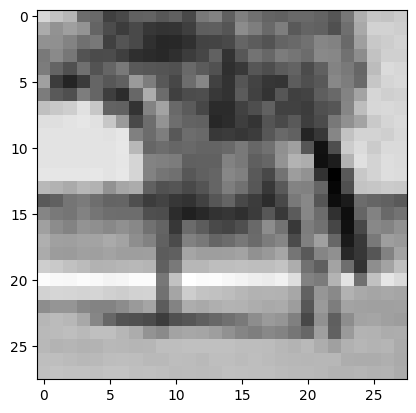

1/1 [==============================] - 0s 29ms/step
fake


In [ ]:
import numpy as np
from PIL import Image

# تحميل الصورة
image_path = "/content/Halterstandingshotarabianone.jpg"
image = Image.open(image_path)
image = image.resize((28, 28))  # تغيير حجم الصورة إلى 28x28 مثل قاعدة بيانات MNIST
image = image.convert("L")  # تحويل الصورة إلى الدرجات الرمادية
image = np.array(image) / 255.0  # تحويل الصورة إلى مصفوفة وتقسيمها على 255 لتحويل القيم إلى [0, 1]

# إظهار الصورة
import matplotlib.pyplot as plt
plt.imshow(image, cmap='gray')
plt.show()

# تصنيف الصورة باستخدام النموذج الذي قمت بتدريبه
prediction = model.predict(np.expand_dims(image, axis=0))
predicted_class = np.argmax(prediction)

# إظهار نتيجة التصنيف
if predicted_class == 0:
    print("real")
else:
    print("fake")